#**📦 Importing**

In [ ]:
# library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

##**🗂️ Dataset 1**

In [ ]:
df = pd.read_csv("Invistico_Airline.csv")
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


### Data Understanding


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Cleaning data

In [ ]:
cols_to_drop = ['Arrival Delay in Minutes', 'Unnamed: 0']
cols_in_df = [col for col in cols_to_drop if col in df.columns]
if cols_in_df:
    df.drop(cols_in_df, axis=1, inplace=True)


In [ ]:
# Memeriksa kolom dalam DataFrame
print("Kolom dalam DataFrame:", df.columns)

# Mendefinisikan kolom yang akan dihapus
cols_to_drop = ['Arrival Delay in Minutes', 'Unnamed: 0']

# Memeriksa kolom yang ada dalam DataFrame
cols_in_df = [col for col in cols_to_drop if col in df.columns]

# Menghapus kolom jika ada
if cols_in_df:
    df.drop(cols_in_df, axis=1, inplace=True)
    print(f"Kolom {cols_in_df} telah dihapus.")
else:
    print("Tidak ada kolom yang ditemukan untuk dihapus.")

Kolom dalam DataFrame: Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')
Tidak ada kolom yang ditemukan untuk dihapus.


In [ ]:
df.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64

In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [ ]:
# Menghitung z-scores untuk kolom numerik
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Menentukan threshold untuk mendeteksi outliers
threshold = 3

# Mendapatkan indeks baris yang mengandung outliers
outliers = np.where(z_scores > threshold)
outlier_rows = np.unique(outliers[0])

# Menampilkan indeks outliers
print("Index outliers:", outlier_rows)

Index outliers: [     1     41    226 ... 129877 129878 129879]


In [ ]:
# Menghapus baris yang mengandung outlier
df = df.drop(outlier_rows)
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,0,2,2,5,4,5,5,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,...,5,2,2,4,5,4,4,3,2,9
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,...,5,4,4,5,4,4,3,4,4,4
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,...,4,3,3,5,2,5,3,5,3,7
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,5,2,2,3,5,3,5,4,2,5


In [ ]:
df.to_csv('CustomerType1', index=False)

### Point 1. Jumlah pengguna aktif: Menunjukkan seberapa banyak pengguna yang menggunakan website secara rutin

In [ ]:
# Menghitung jumlah pengguna aktif berdasarkan kolom Customer Type
pengguna_aktif = df[df["Customer Type"] == "Loyal Customer"]
# Menampilkan Jumlah pengguna aktif
print("Jumlah Pengguna Aktif:", len(pengguna_aktif))

Jumlah Pengguna Aktif: 103188


In [ ]:
# Filter pengguna aktif berdasarkan kerteria tertentu
pengguna_aktif_pria = pengguna_aktif[pengguna_aktif["Gender"] == "Male"]
pengguna_aktif_perempuan = pengguna_aktif[pengguna_aktif["Gender"] == "Female"]

# Menampilkan jumlah pengguna aktif secara Gender
print("Jumlah Pengguna Aktif berdasarkan pria:", len(pengguna_aktif_pria))
print("Jumlah Pengguna Aktif berdasarkan perempuan:", len(pengguna_aktif_perempuan))

Jumlah Pengguna Aktif berdasarkan pria: 51591
Jumlah Pengguna Aktif berdasarkan perempuan: 51597


Jumlah Pengguna Aktif berdasarkan pria: 51591
Jumlah Pengguna Aktif berdasarkan perempuan: 51597


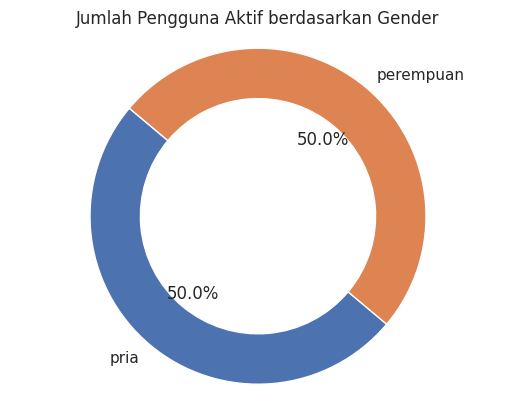

In [ ]:
print("Jumlah Pengguna Aktif berdasarkan pria:", len(pengguna_aktif_pria))
print("Jumlah Pengguna Aktif berdasarkan perempuan:", len(pengguna_aktif_perempuan))

kartagori_pengguna = ["pria","perempuan"]
jumlah_pengguna = [len(pengguna_aktif_pria),len(pengguna_aktif_perempuan)]

import matplotlib.pyplot as plt

# Data
kategori_pengguna = ["pria", "perempuan"]
jumlah_pengguna = [len(pengguna_aktif_pria), len(pengguna_aktif_perempuan)]

# Membuat pie chart (donut chart)
plt.pie(jumlah_pengguna, labels=kategori_pengguna, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Jumlah Pengguna Aktif berdasarkan Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Kesimpulan:** Berdasarkan data pengguna aktif yang diidentifikasi menurut jenis kelamin, terlihat bahwa terdapat perbedaan jumlah antara pengguna pria dan pengguna perempuan. Dengan menggunakan pie chart berbentuk donut, kita dapat melihat persentase masing-masing kelompok pengguna tersebut secara visual. Meskipun angka spesifik jumlah pengguna pria dan perempuan tidak disertakan dalam kesimpulan ini, pie chart tersebut menunjukkan proporsi pengguna aktif dalam dua kategori gender tersebut dengan jelas dan informatif. Jumlah pengguna aktif ini menunjukkan seberapa banyak pengguna yang menggunakan website secara rutin,  serta membantu dalam perencanaan strategi pemasaran dan pengembangan produk di masa mendatang.

###Point 5. Retention rate: Tingkat kesetiaan pengguna dalam menggunakan website dari waktu ke waktu.

In [ ]:
pelanggan_setia = df[df['Customer Type'] == "Loyal Customer"]
pelanggan_tidak_setia = df[df['Customer Type'] == "disloyal Customer"]
print("Jumlah Loyal Customer", len(pelanggan_setia))
print("Jumlah disloyal Customer", len(pelanggan_tidak_setia))

Jumlah Loyal Customer 103188
Jumlah disloyal Customer 23251


In [ ]:
# Menghitung jumlah total pengguna
total_users = df['Customer Type'].count()

# Menghitung jumlah pengguna loyal
loyal_users = df[df['Customer Type'] == 'Loyal Customer'].count()['Customer Type']

# Menghitung retention rate
retention_rate = loyal_users / total_users * 100

print(f'Retention Rate: {retention_rate:.2f}%')

Retention Rate: 81.61%


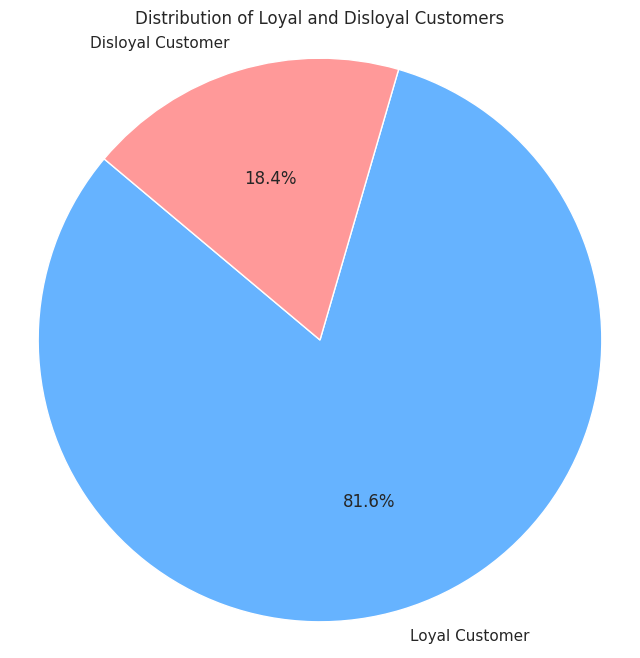

In [ ]:
# Menghitung jumlah pengguna loyal dan tidak loyal
loyal_users = df[df['Customer Type'] == 'Loyal Customer'].count()['Customer Type']
disloyal_users = df[df['Customer Type'] == 'disloyal Customer'].count()['Customer Type']

# Menyimpan data dalam list untuk visualisasi
labels = ['Loyal Customer', 'Disloyal Customer']
sizes = [loyal_users, disloyal_users]

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Loyal and Disloyal Customers')
plt.show()


### Point 3. Customer satisfaction: Tingkat kepuasan pengguna terhadap fitur dan layanan yang disediakan oleh website.

<Figure size 1400x1000 with 0 Axes>

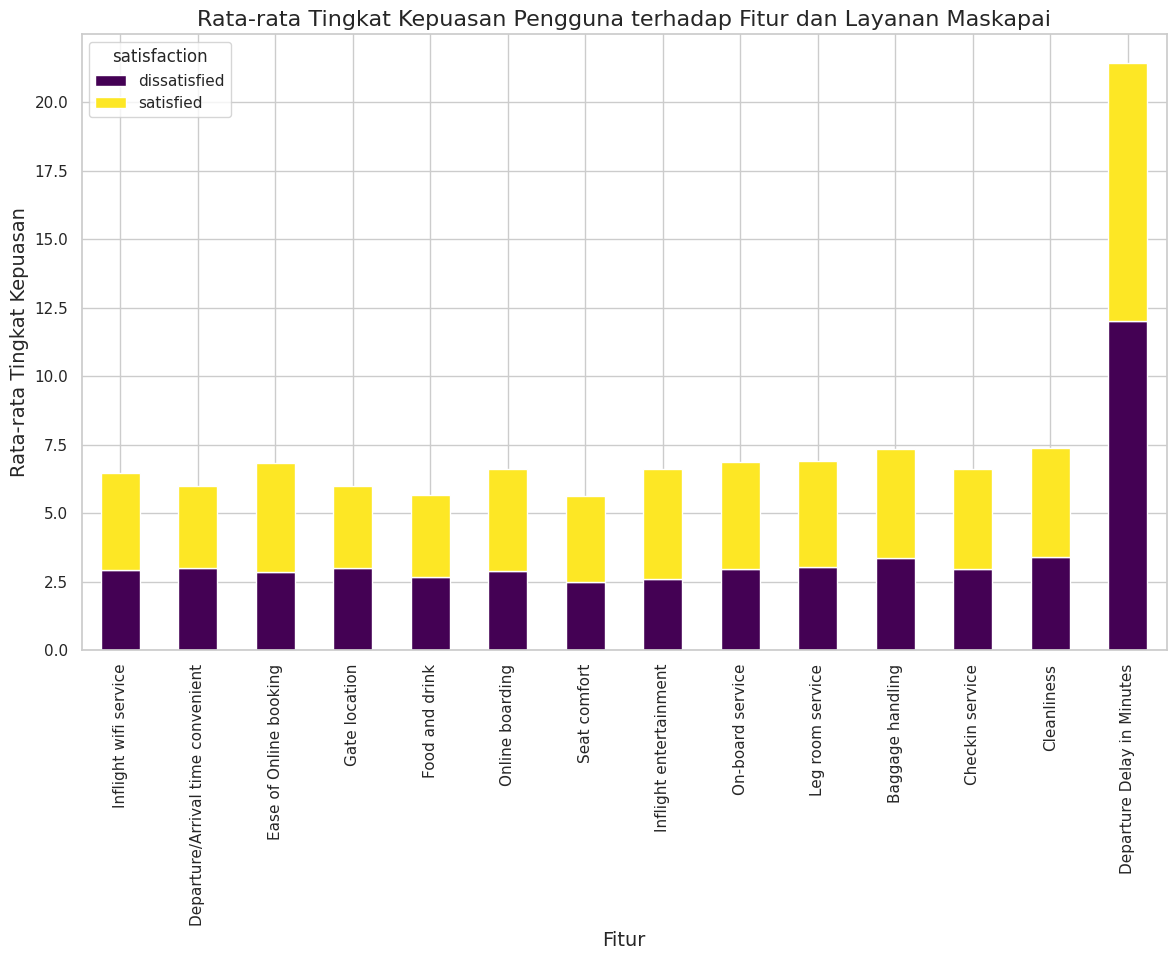

In [ ]:
# Memastikan hanya menggunakan kolom yang ada di dataset
available_features = [feature for feature in features if feature in df.columns]

# Menghitung rata-rata tingkat kepuasan untuk setiap fitur
satisfaction_means = df[available_features + ['satisfaction']].groupby('satisfaction').mean().T

# Mengatur gaya visualisasi seaborn
sns.set(style="whitegrid")

# Membuat plot batang bertumpuk untuk setiap fitur
plt.figure(figsize=(14, 10))

# Plotting
satisfaction_means.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Tingkat Kepuasan Pengguna terhadap Fitur dan Layanan Maskapai', fontsize=16)
plt.xlabel('Fitur', fontsize=14)
plt.ylabel('Rata-rata Tingkat Kepuasan', fontsize=14)

# Menampilkan plot
plt.show()

Interpretasi Hasil:

- Dari plot ini, kita dapat mengidentifikasi fitur dan layanan yang mendapatkan tingkat kepuasan tinggi dari pengguna, serta yang mendapatkan tingkat kepuasan rendah.
- Fitur dengan batang yang lebih tinggi menunjukkan bahwa pengguna merasa sangat puas dengan aspek tersebut.
- Sebaliknya, fitur dengan batang yang lebih rendah menunjukkan area di mana maskapai penerbangan mungkin perlu melakukan perbaikan untuk meningkatkan pengalaman pengguna.

<ipython-input-34-c7075431ec35>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ease of Online booking', y='satisfaction', data=df, ci=None, palette='viridis')
<ipython-input-34-c7075431ec35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ease of Online booking', y='satisfaction', data=df, ci=None, palette='viridis')


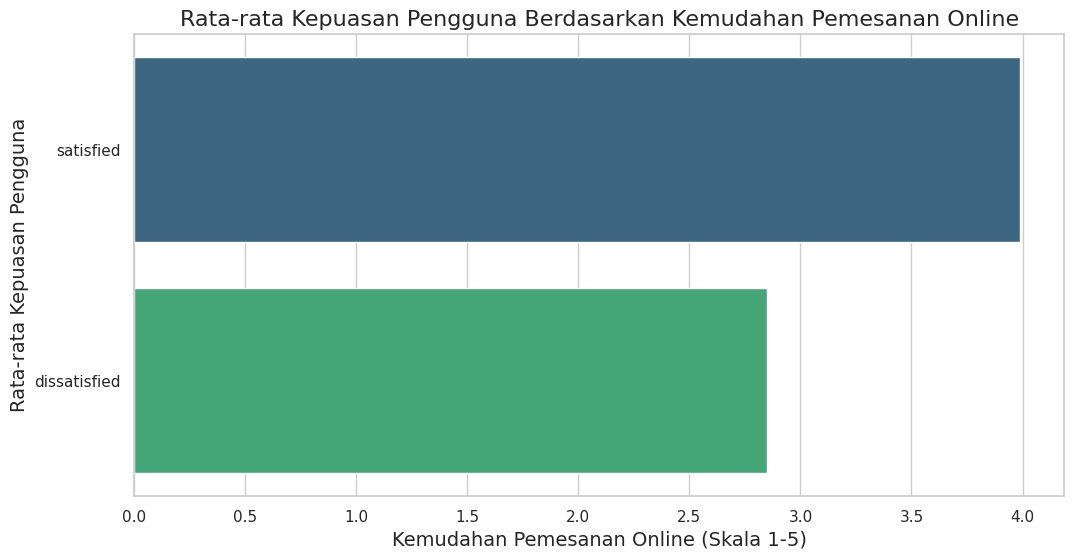

In [ ]:
# Bar Plot untuk rata-rata kepuasan berdasarkan 'Ease of Online booking'
plt.figure(figsize=(12, 6))
sns.barplot(x='Ease of Online booking', y='satisfaction', data=df, ci=None, palette='viridis')
plt.title('Rata-rata Kepuasan Pengguna Berdasarkan Kemudahan Pemesanan Online', fontsize=16)
plt.xlabel('Kemudahan Pemesanan Online (Skala 1-5)', fontsize=14)
plt.ylabel('Rata-rata Kepuasan Pengguna', fontsize=14)
plt.show()

### Point 7. Error rate: Tingkat keberhasilan pengguna dalam menyelesaikan proses pemesanan tiket tanpa terjadi kesalahan atau gangguan.

In [ ]:
# Membuat fungsi untuk kategiri error rate
def categorize_ease_of_booking(ease):
    if ease == 0:
        return 'Not Applicable'
    elif ease in [1, 2]:
        return 'Error or Difficult'
    elif ease == 3:
        return 'Neutral'
    elif ease in [4, 5]:
        return 'No Difficulty/No Error'

In [ ]:
df['Booking Ease Category'] = df['Ease of Online booking'].apply(categorize_ease_of_booking)
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Booking Ease Category
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,Neutral
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,Error or Difficult
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,Error or Difficult
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,Error or Difficult
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,Error or Difficult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129871,satisfied,Female,disloyal Customer,35,Personal Travel,Eco,3287,5,4,5,...,2,2,4,5,4,4,3,2,9,Error or Difficult
129872,satisfied,Female,disloyal Customer,69,Personal Travel,Eco,2240,5,4,5,...,4,4,5,4,4,3,4,4,4,No Difficulty/No Error
129873,satisfied,Female,disloyal Customer,63,Personal Travel,Eco,1942,5,5,4,...,3,3,5,2,5,3,5,3,7,Neutral
129874,satisfied,Female,disloyal Customer,11,Personal Travel,Eco,2752,5,5,5,...,2,2,3,5,3,5,4,2,5,Error or Difficult


In [ ]:
# Menampilkan distribusi kategori
category_counts = df['Booking Ease Category'].value_counts()
print(category_counts)

Booking Ease Category
No Difficulty/No Error    72414
Error or Difficult        32470
Neutral                   21542
Not Applicable               13
Name: count, dtype: int64


<ipython-input-38-d01583c41cf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Booking Ease Category', data=df, palette='viridis', order=category_counts.index)


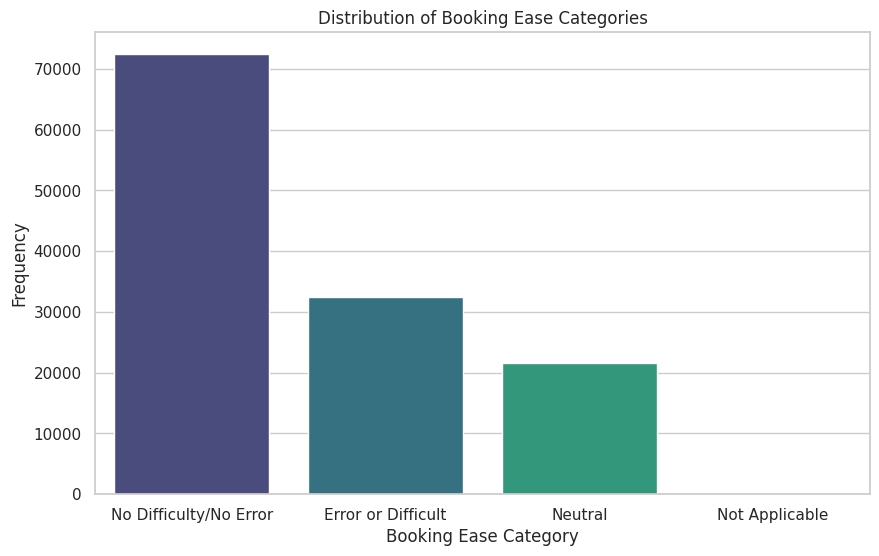

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Booking Ease Category', data=df, palette='viridis', order=category_counts.index)
plt.xlabel('Booking Ease Category')
plt.ylabel('Frequency')
plt.title('Distribution of Booking Ease Categories')
plt.show()

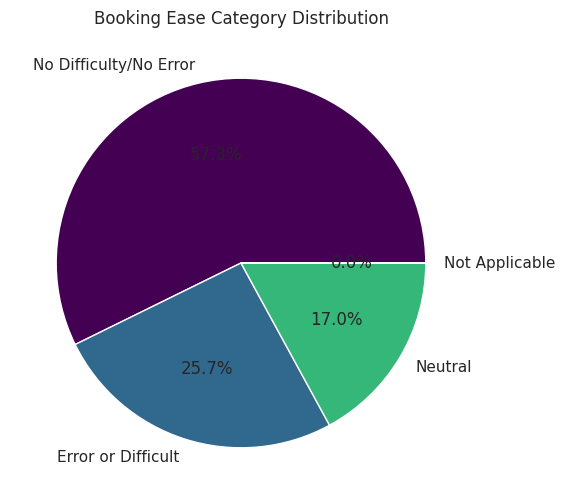

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", colors=plt.cm.viridis(np.linspace(0, 1, len(category_counts))))
plt.title('Booking Ease Category Distribution')
plt.show()


not applicable terhitung 0.0% karena nilainya sangat kecil jika dibandingkan dengan nilai kategory lainnya sehingga disimpulkan bahwa tingkat keberhasilan pengguna dalam menyelesaikan proses pemesanan tiket tanpa terjadi kesalahan atau gangguan sangat tinggi.

## **🗂️ Dataset 2**


In [ ]:
df = pd.read_csv("/content/customer_booking.csv",encoding = "latin-1")
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


###Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


###Data Cleaning dan Pengolahan Fitur

In [ ]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.duplicated().sum()

719

In [ ]:
df=df.drop_duplicates()

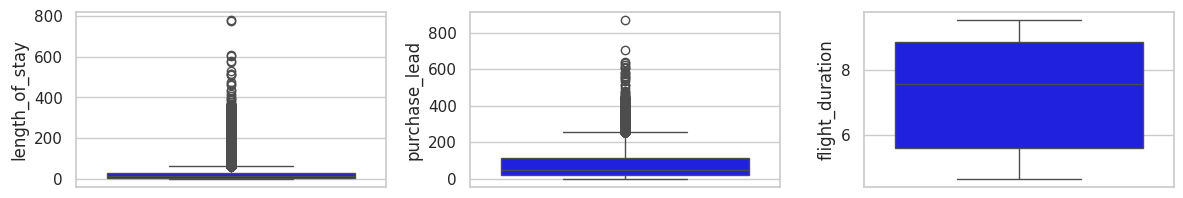

In [ ]:
# Handling Outliers
nums_int = ['length_of_stay', 'purchase_lead', 'flight_duration']
plt.figure(figsize=(12,6))
for i in range(0,len(nums_int)):
    plt.subplot(3,len(nums_int),i+1)
    sns.boxplot(df[nums_int[i]],color='blue')
    plt.tight_layout()

Kesimpulan :
Berdasarkan grafik di atas, terlihat bahwa outlier pada fitur numerik sangat sedikit. jadi, dapat kita abaikan

### Feature Extraction

In [ ]:
df['total_booking_complate'] = df['booking_complete'] * df['num_passengers']
df.tail()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_booking_complate
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,0
49999,1,Internet,RoundTrip,19,6,10,Thu,PERPNH,Australia,0,1,0,5.62,0,0


###Variable Correlation

In [ ]:
df_baru = df[['num_passengers', 'purchase_lead', 'length_of_stay',	'flight_hour', 'wants_extra_baggage',	'wants_preferred_seat',	'wants_in_flight_meals', 'flight_duration',	'booking_complete']]

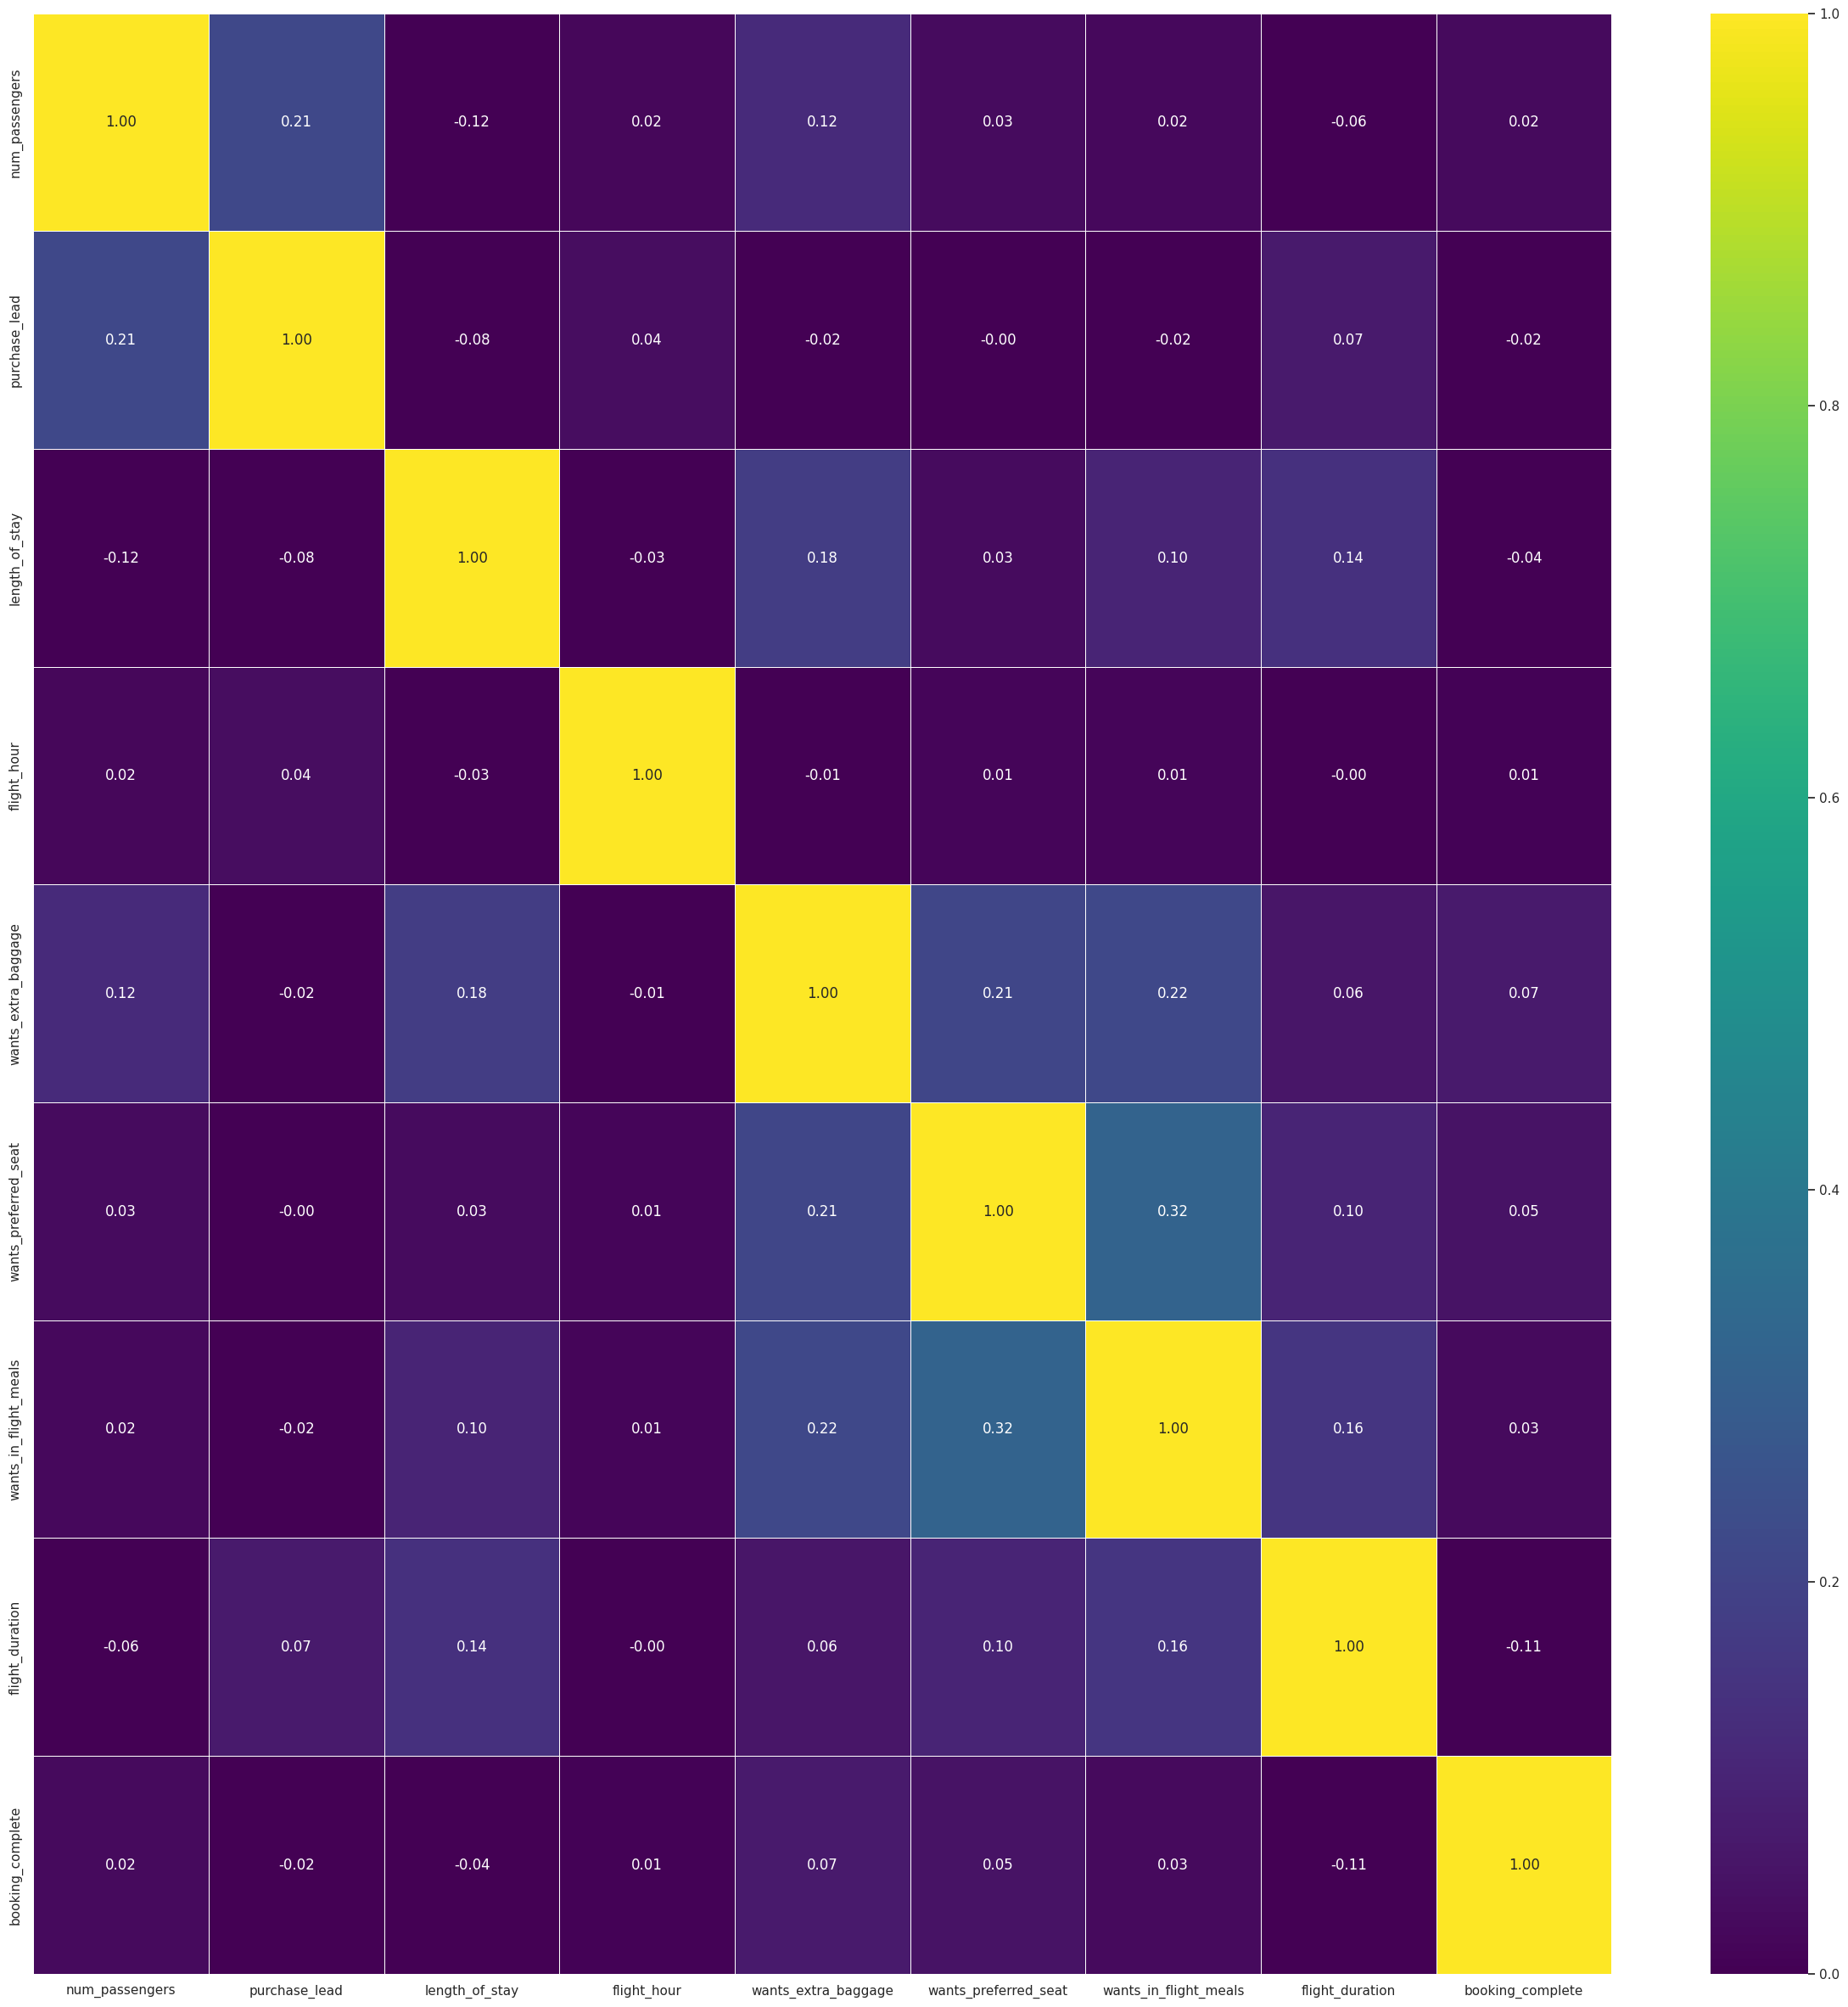

In [ ]:
#heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_baru.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

### point 2. Jumlah pemesanan tiket: Menunjukkan seberapa banyak tiket yang berhasil terjual melalui website.

In [ ]:
jumlah_transaksi = df['num_passengers'].sum()
jumlah_transaksi

78366

<Axes: title={'center': 'Countries with Most Booking'}, xlabel='booking_origin', ylabel='num_passengers'>

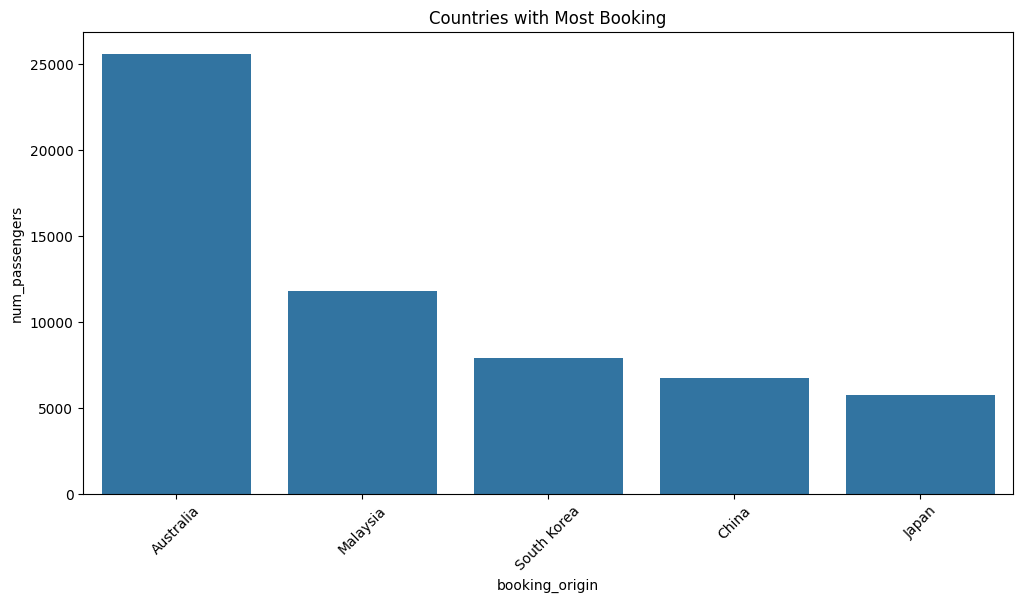

In [ ]:
plt.figure(figsize=(12,6))
countries_most_booking = df.groupby(['booking_origin'])[['num_passengers']].sum().reset_index().sort_values(by='num_passengers', ascending=False).head(5).reset_index(drop=True)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.title('Countries with Most Booking')
sns.barplot(data=countries_most_booking, x='booking_origin', y='num_passengers')


Text(0, 0.5, 'passengers')

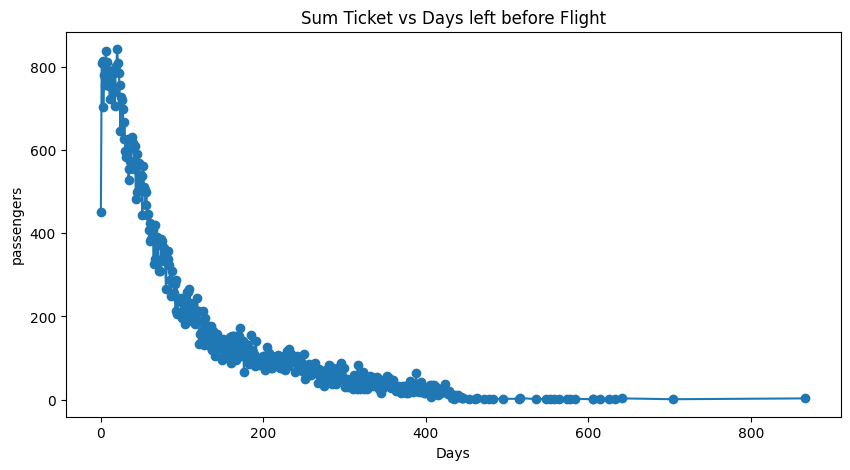

In [ ]:
days_lead_sum = df.groupby('purchase_lead')['num_passengers'].sum()
plt.figure(figsize=(10,5))
plt.plot(days_lead_sum.index, days_lead_sum.values, 'o-')
plt.title('Sum Ticket vs Days left before Flight')
plt.xlabel('Days')
plt.ylabel('passengers')

### Poin 4. Conversion rate: Rasio antara jumlah pengunjung website dan jumlah pengguna yang berhasil melakukan transaksi.

In [ ]:
total_pengunjung = jumlah_transaksi
jumlah_transaksi_selesai = df['total_booking_complate'].sum()

conversion_rate = (jumlah_transaksi_selesai / total_pengunjung)*100

print(f"Total Pengunjung Website: {total_pengunjung}")
print(f"Jumlah Transaksi Selesai: {jumlah_transaksi_selesai}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Total Pengunjung Website: 78366
Jumlah Transaksi Selesai: 12184
Conversion Rate: 15.55%


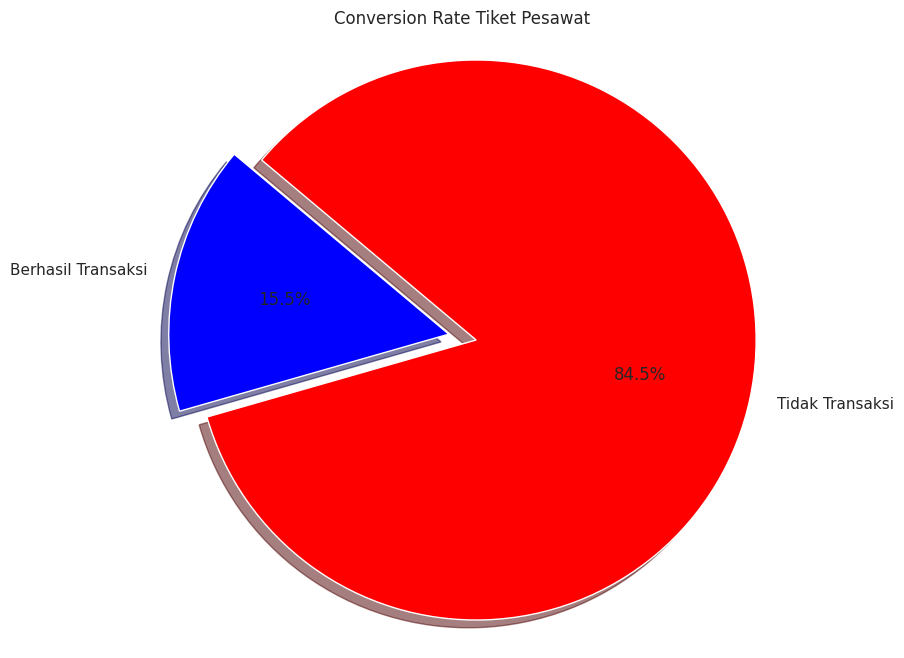

In [ ]:
jumlah_transaksi_gagal = total_pengunjung - jumlah_transaksi_selesai

labels = ['Berhasil Transaksi', 'Tidak Transaksi']
sizes = [jumlah_transaksi_selesai, jumlah_transaksi_gagal]
colors = ['blue', 'red']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Conversion Rate Tiket Pesawat')
plt.show()

## 🗂️ Dataset 3

In [ ]:
df = pd.read_csv("/content/Flight_Passengers.csv")
df

,Unnamed: 0,CustId,Cust_F_Name,Cust_L_Name,Cust_Age,Cust_Gender,Cust_Since,Flying_From,Flying_To,Scheduled_Departure_From_Start_City,...,Actual_Time_Of_Arrival,Date_Of_Booking,Time_Of_Booking,Last_Update,Seat_Allocated,Flight_Number,Stop_Over_1,Break_in_Hours1,Stop_Over_2,Break_in_Hours2
0,0,10001,Manoj,Kumar,42,M,2011,Hyderabad,Delhi,May-09-2017 16:00:00,...,May-09-2017 19:09:00,24-Apr-2017,24-Apr-2017 05:40:58,24-Apr-2017 03:37:24,37B,DB_6E112,NaN,0.0,NaN,0.0
1,1,10002,Manish,Kumar,35,M,2015,Kolkata,Mumbai,May-10-2017 11:00:00,...,May-10-2017 14:12:00,19-Apr-2017,19-Apr-2017 21:46:14,19-Apr-2017 19:53:15,26A,IE_4A116,NaN,0.0,NaN,0.0
2,2,10003,Radha,Reddy,19,F,2016,Chennai,Hyderabad,May-13-2017 17:00:00,...,May-13-2017 18:07:00,23-Apr-2017,23-Apr-2017 02:08:41,23-Apr-2017 02:08:41,37B,EJ_4C113,NaN,0.0,NaN,0.0
3,3,10004,Ramdin,Verma,45,M,2007,Mumbai,Dehradun,Jul-20-2018 22:12:00,...,Jul-21-2018 3:34:00,01-Jul-2018,01-Jul-2018 15:46:08,01-Jul-2018 15:41:37,17A,CF_6A122,New Delhi,1.0,NaN,0.0
4,4,10005,Sharat,Chandran,32,M,2011,New Delhi,Hyderabad,Oct-13-2018 23:45:00,...,Oct-14-2018 1:56:00,20-Sep-2018,20-Sep-2018 04:55:31,20-Sep-2018 03:59:13,37E,EB_5E111,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,10120,Hamida,Khatun,21,F,2017,Mumbai,Hyderabad,Oct-16-2018 3:20:00,...,Oct-16-2018 5:03:00,18-Sep-2018,18-Sep-2018 7:02:45,18-Sep-2018 05:45:20,12D,FE_4D112,NaN,0.0,NaN,0.0
120,120,10121,Priyaki,Rav,16,F,2018,Jammu,Vasco da Gama,Aug-05-2019 4:37:00,...,Aug-05-2019 12:54:00,05-Jul-2019,05-Jul-2019 17:25:08,05-Jul-2019 16:36:28,21D,EJ_6C127,New Delhi,1.0,Mumbai,1.0
121,121,10122,Ranu,Tiwari,26,F,2018,Kochi,Hyderabad,May-05-2019 5:53:00,...,May-05-2019 8:13:00,31-Mar-2019,31-Mar-2019 11:43:48,31-Mar-2019 10:12:08,8E,IA_3E114,NaN,0.0,NaN,0.0
122,122,10123,Anita,Devi,49,F,2016,Guwahati,Mumbai,May-27-2018 10:41:00,...,May-27-2018 16:54:00,27-Apr-2018,27-Apr-2018 22:59:05,27-Apr-2018 21:28:34,26F,LH_3B114,Kolkata,2.0,NaN,0.0


### Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           124 non-null    int64  
 1   CustId                               124 non-null    int64  
 2   Cust_F_Name                          124 non-null    object 
 3   Cust_L_Name                          124 non-null    object 
 4   Cust_Age                             124 non-null    int64  
 5   Cust_Gender                          124 non-null    object 
 6   Cust_Since                           124 non-null    int64  
 7   Flying_From                          124 non-null    object 
 8   Flying_To                            124 non-null    object 
 9   Scheduled_Departure_From_Start_City  124 non-null    object 
 10  Actual_Time_of_Departure             124 non-null    object 
 11  Scheduled_Arrival_To_Destination

In [ ]:
df.describe()

,Unnamed: 0,CustId,Cust_Age,Cust_Since,Break_in_Hours1,Break_in_Hours2
count,124.000000,124.000000,124.000000,124.000000,124.000000,121.000000
mean,61.500000,10062.500000,36.241935,2011.911290,0.491935,0.132231
std,35.939764,35.939764,14.166473,4.546082,0.627888,0.427047
min,0.000000,10001.000000,11.000000,2001.000000,0.000000,0.000000
25%,30.750000,10031.750000,26.000000,2009.000000,0.000000,0.000000
50%,61.500000,10062.500000,34.500000,2012.000000,0.000000,0.000000
75%,92.250000,10093.250000,45.250000,2016.000000,1.000000,0.000000
max,123.000000,10124.000000,70.000000,2019.000000,2.000000,2.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Unnamed: 0                               0
CustId                                   0
Cust_F_Name                              0
Cust_L_Name                              0
Cust_Age                                 0
Cust_Gender                              0
Cust_Since                               0
Flying_From                              0
Flying_To                                0
Scheduled_Departure_From_Start_City      0
Actual_Time_of_Departure                 0
Scheduled_Arrival_To_Destination         0
Actual_Time_Of_Arrival                   0
Date_Of_Booking                          0
Time_Of_Booking                          0
Last_Update                              0
Seat_Allocated                           0
Flight_Number                            0
Stop_Over_1                             72
Break_in_Hours1                          0
Stop_Over_2                            111
Break_in_Hours2                          3
dtype: int64

### Data Cleaning

In [ ]:
df = df.drop(columns=['Stop_Over_1', 'Stop_Over_2', 'Break_in_Hours2'])
df

,Unnamed: 0,CustId,Cust_F_Name,Cust_L_Name,Cust_Age,Cust_Gender,Cust_Since,Flying_From,Flying_To,Scheduled_Departure_From_Start_City,Actual_Time_of_Departure,Scheduled_Arrival_To_Destination,Actual_Time_Of_Arrival,Date_Of_Booking,Time_Of_Booking,Last_Update,Seat_Allocated,Flight_Number,Break_in_Hours1
0,0,10001,Manoj,Kumar,42,M,2011,Hyderabad,Delhi,May-09-2017 16:00:00,May-09-2017 16:00:00,May-09-2017 19:00:00,May-09-2017 19:09:00,24-Apr-2017,24-Apr-2017 05:40:58,24-Apr-2017 03:37:24,37B,DB_6E112,0.0
1,1,10002,Manish,Kumar,35,M,2015,Kolkata,Mumbai,May-10-2017 11:00:00,May-10-2017 11:00:00,May-10-2017 14:00:00,May-10-2017 14:12:00,19-Apr-2017,19-Apr-2017 21:46:14,19-Apr-2017 19:53:15,26A,IE_4A116,0.0
2,2,10003,Radha,Reddy,19,F,2016,Chennai,Hyderabad,May-13-2017 17:00:00,May-13-2017 17:00:00,May-13-2017 18:00:00,May-13-2017 18:07:00,23-Apr-2017,23-Apr-2017 02:08:41,23-Apr-2017 02:08:41,37B,EJ_4C113,0.0
3,3,10004,Ramdin,Verma,45,M,2007,Mumbai,Dehradun,Jul-20-2018 22:12:00,Jul-20-2018 22:21:00,Jul-21-2018 3:12:00,Jul-21-2018 3:34:00,01-Jul-2018,01-Jul-2018 15:46:08,01-Jul-2018 15:41:37,17A,CF_6A122,1.0
4,4,10005,Sharat,Chandran,32,M,2011,New Delhi,Hyderabad,Oct-13-2018 23:45:00,Oct-13-2018 23:51:00,Oct-14-2018 1:45:00,Oct-14-2018 1:56:00,20-Sep-2018,20-Sep-2018 04:55:31,20-Sep-2018 03:59:13,37E,EB_5E111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,10120,Hamida,Khatun,21,F,2017,Mumbai,Hyderabad,Oct-16-2018 3:20:00,Oct-16-2018 3:28:00,Oct-16-2018 4:50:00,Oct-16-2018 5:03:00,18-Sep-2018,18-Sep-2018 7:02:45,18-Sep-2018 05:45:20,12D,FE_4D112,0.0
120,120,10121,Priyaki,Rav,16,F,2018,Jammu,Vasco da Gama,Aug-05-2019 4:37:00,Aug-05-2019 4:46:00,Aug-05-2019 12:37:00,Aug-05-2019 12:54:00,05-Jul-2019,05-Jul-2019 17:25:08,05-Jul-2019 16:36:28,21D,EJ_6C127,1.0
121,121,10122,Ranu,Tiwari,26,F,2018,Kochi,Hyderabad,May-05-2019 5:53:00,May-05-2019 6:02:00,May-05-2019 7:53:00,May-05-2019 8:13:00,31-Mar-2019,31-Mar-2019 11:43:48,31-Mar-2019 10:12:08,8E,IA_3E114,0.0
122,122,10123,Anita,Devi,49,F,2016,Guwahati,Mumbai,May-27-2018 10:41:00,May-27-2018 10:49:00,May-27-2018 16:41:00,May-27-2018 16:54:00,27-Apr-2018,27-Apr-2018 22:59:05,27-Apr-2018 21:28:34,26F,LH_3B114,2.0


In [ ]:
from scipy import stats

# Menghitung Z-score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Threshold umum untuk Z-score adalah 3
threshold = 3
outliers = np.where(z_scores > threshold)

# Menentukan baris yang memiliki outlier
outlier_rows = np.unique(outliers[0])

print("Index outliers:", outlier_rows)

Index outliers: []


In [ ]:
df = df[df['Last_Update'] <= df['Time_Of_Booking']]
df

,Unnamed: 0,CustId,Cust_F_Name,Cust_L_Name,Cust_Age,Cust_Gender,Cust_Since,Flying_From,Flying_To,Scheduled_Departure_From_Start_City,Actual_Time_of_Departure,Scheduled_Arrival_To_Destination,Actual_Time_Of_Arrival,Date_Of_Booking,Time_Of_Booking,Last_Update,Seat_Allocated,Flight_Number,Break_in_Hours1
0,0,10001,Manoj,Kumar,42,M,2011,Hyderabad,Delhi,May-09-2017 16:00:00,May-09-2017 16:00:00,May-09-2017 19:00:00,May-09-2017 19:09:00,24-Apr-2017,24-Apr-2017 05:40:58,24-Apr-2017 03:37:24,37B,DB_6E112,0.0
1,1,10002,Manish,Kumar,35,M,2015,Kolkata,Mumbai,May-10-2017 11:00:00,May-10-2017 11:00:00,May-10-2017 14:00:00,May-10-2017 14:12:00,19-Apr-2017,19-Apr-2017 21:46:14,19-Apr-2017 19:53:15,26A,IE_4A116,0.0
2,2,10003,Radha,Reddy,19,F,2016,Chennai,Hyderabad,May-13-2017 17:00:00,May-13-2017 17:00:00,May-13-2017 18:00:00,May-13-2017 18:07:00,23-Apr-2017,23-Apr-2017 02:08:41,23-Apr-2017 02:08:41,37B,EJ_4C113,0.0
3,3,10004,Ramdin,Verma,45,M,2007,Mumbai,Dehradun,Jul-20-2018 22:12:00,Jul-20-2018 22:21:00,Jul-21-2018 3:12:00,Jul-21-2018 3:34:00,01-Jul-2018,01-Jul-2018 15:46:08,01-Jul-2018 15:41:37,17A,CF_6A122,1.0
4,4,10005,Sharat,Chandran,32,M,2011,New Delhi,Hyderabad,Oct-13-2018 23:45:00,Oct-13-2018 23:51:00,Oct-14-2018 1:45:00,Oct-14-2018 1:56:00,20-Sep-2018,20-Sep-2018 04:55:31,20-Sep-2018 03:59:13,37E,EB_5E111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,10120,Hamida,Khatun,21,F,2017,Mumbai,Hyderabad,Oct-16-2018 3:20:00,Oct-16-2018 3:28:00,Oct-16-2018 4:50:00,Oct-16-2018 5:03:00,18-Sep-2018,18-Sep-2018 7:02:45,18-Sep-2018 05:45:20,12D,FE_4D112,0.0
120,120,10121,Priyaki,Rav,16,F,2018,Jammu,Vasco da Gama,Aug-05-2019 4:37:00,Aug-05-2019 4:46:00,Aug-05-2019 12:37:00,Aug-05-2019 12:54:00,05-Jul-2019,05-Jul-2019 17:25:08,05-Jul-2019 16:36:28,21D,EJ_6C127,1.0
121,121,10122,Ranu,Tiwari,26,F,2018,Kochi,Hyderabad,May-05-2019 5:53:00,May-05-2019 6:02:00,May-05-2019 7:53:00,May-05-2019 8:13:00,31-Mar-2019,31-Mar-2019 11:43:48,31-Mar-2019 10:12:08,8E,IA_3E114,0.0
122,122,10123,Anita,Devi,49,F,2016,Guwahati,Mumbai,May-27-2018 10:41:00,May-27-2018 10:49:00,May-27-2018 16:41:00,May-27-2018 16:54:00,27-Apr-2018,27-Apr-2018 22:59:05,27-Apr-2018 21:28:34,26F,LH_3B114,2.0


### Point 6. Time to complete booking: Waktu yang dibutuhkan oleh pengguna untuk menyelesaikan proses pemesanan tiket melalui website

### Feature Extraction

In [ ]:
# Convert 'Last_Update' and 'Time_Of_Booking' to datetime objects
df['Last_Update'] = pd.to_datetime(df['Last_Update'])
df['Time_Of_Booking'] = pd.to_datetime(df['Time_Of_Booking'])

# Now calculate the time difference
df['diff_time'] = df['Time_Of_Booking'] - df['Last_Update']
df['diff_time'] = df['diff_time'].dt.total_seconds() / 60  # Convert to minutes
df

<ipython-input-67-4ce471c51d0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Last_Update'] = pd.to_datetime(df['Last_Update'])
<ipython-input-67-4ce471c51d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Of_Booking'] = pd.to_datetime(df['Time_Of_Booking'])
<ipython-input-67-4ce471c51d0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,Unnamed: 0,CustId,Cust_F_Name,Cust_L_Name,Cust_Age,Cust_Gender,Cust_Since,Flying_From,Flying_To,Scheduled_Departure_From_Start_City,Actual_Time_of_Departure,Scheduled_Arrival_To_Destination,Actual_Time_Of_Arrival,Date_Of_Booking,Time_Of_Booking,Last_Update,Seat_Allocated,Flight_Number,Break_in_Hours1,diff_time
0,0,10001,Manoj,Kumar,42,M,2011,Hyderabad,Delhi,May-09-2017 16:00:00,May-09-2017 16:00:00,May-09-2017 19:00:00,May-09-2017 19:09:00,24-Apr-2017,2017-04-24 05:40:58,2017-04-24 03:37:24,37B,DB_6E112,0.0,123.566667
1,1,10002,Manish,Kumar,35,M,2015,Kolkata,Mumbai,May-10-2017 11:00:00,May-10-2017 11:00:00,May-10-2017 14:00:00,May-10-2017 14:12:00,19-Apr-2017,2017-04-19 21:46:14,2017-04-19 19:53:15,26A,IE_4A116,0.0,112.983333
2,2,10003,Radha,Reddy,19,F,2016,Chennai,Hyderabad,May-13-2017 17:00:00,May-13-2017 17:00:00,May-13-2017 18:00:00,May-13-2017 18:07:00,23-Apr-2017,2017-04-23 02:08:41,2017-04-23 02:08:41,37B,EJ_4C113,0.0,0.000000
3,3,10004,Ramdin,Verma,45,M,2007,Mumbai,Dehradun,Jul-20-2018 22:12:00,Jul-20-2018 22:21:00,Jul-21-2018 3:12:00,Jul-21-2018 3:34:00,01-Jul-2018,2018-07-01 15:46:08,2018-07-01 15:41:37,17A,CF_6A122,1.0,4.516667
4,4,10005,Sharat,Chandran,32,M,2011,New Delhi,Hyderabad,Oct-13-2018 23:45:00,Oct-13-2018 23:51:00,Oct-14-2018 1:45:00,Oct-14-2018 1:56:00,20-Sep-2018,2018-09-20 04:55:31,2018-09-20 03:59:13,37E,EB_5E111,0.0,56.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,10120,Hamida,Khatun,21,F,2017,Mumbai,Hyderabad,Oct-16-2018 3:20:00,Oct-16-2018 3:28:00,Oct-16-2018 4:50:00,Oct-16-2018 5:03:00,18-Sep-2018,2018-09-18 07:02:45,2018-09-18 05:45:20,12D,FE_4D112,0.0,77.416667
120,120,10121,Priyaki,Rav,16,F,2018,Jammu,Vasco da Gama,Aug-05-2019 4:37:00,Aug-05-2019 4:46:00,Aug-05-2019 12:37:00,Aug-05-2019 12:54:00,05-Jul-2019,2019-07-05 17:25:08,2019-07-05 16:36:28,21D,EJ_6C127,1.0,48.666667
121,121,10122,Ranu,Tiwari,26,F,2018,Kochi,Hyderabad,May-05-2019 5:53:00,May-05-2019 6:02:00,May-05-2019 7:53:00,May-05-2019 8:13:00,31-Mar-2019,2019-03-31 11:43:48,2019-03-31 10:12:08,8E,IA_3E114,0.0,91.666667
122,122,10123,Anita,Devi,49,F,2016,Guwahati,Mumbai,May-27-2018 10:41:00,May-27-2018 10:49:00,May-27-2018 16:41:00,May-27-2018 16:54:00,27-Apr-2018,2018-04-27 22:59:05,2018-04-27 21:28:34,26F,LH_3B114,2.0,90.516667


In [ ]:
df['diff_time'] = df['diff_time'].round()
df

<ipython-input-68-483a78412171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_time'] = df['diff_time'].round()


,Unnamed: 0,CustId,Cust_F_Name,Cust_L_Name,Cust_Age,Cust_Gender,Cust_Since,Flying_From,Flying_To,Scheduled_Departure_From_Start_City,Actual_Time_of_Departure,Scheduled_Arrival_To_Destination,Actual_Time_Of_Arrival,Date_Of_Booking,Time_Of_Booking,Last_Update,Seat_Allocated,Flight_Number,Break_in_Hours1,diff_time
0,0,10001,Manoj,Kumar,42,M,2011,Hyderabad,Delhi,May-09-2017 16:00:00,May-09-2017 16:00:00,May-09-2017 19:00:00,May-09-2017 19:09:00,24-Apr-2017,2017-04-24 05:40:58,2017-04-24 03:37:24,37B,DB_6E112,0.0,124.0
1,1,10002,Manish,Kumar,35,M,2015,Kolkata,Mumbai,May-10-2017 11:00:00,May-10-2017 11:00:00,May-10-2017 14:00:00,May-10-2017 14:12:00,19-Apr-2017,2017-04-19 21:46:14,2017-04-19 19:53:15,26A,IE_4A116,0.0,113.0
2,2,10003,Radha,Reddy,19,F,2016,Chennai,Hyderabad,May-13-2017 17:00:00,May-13-2017 17:00:00,May-13-2017 18:00:00,May-13-2017 18:07:00,23-Apr-2017,2017-04-23 02:08:41,2017-04-23 02:08:41,37B,EJ_4C113,0.0,0.0
3,3,10004,Ramdin,Verma,45,M,2007,Mumbai,Dehradun,Jul-20-2018 22:12:00,Jul-20-2018 22:21:00,Jul-21-2018 3:12:00,Jul-21-2018 3:34:00,01-Jul-2018,2018-07-01 15:46:08,2018-07-01 15:41:37,17A,CF_6A122,1.0,5.0
4,4,10005,Sharat,Chandran,32,M,2011,New Delhi,Hyderabad,Oct-13-2018 23:45:00,Oct-13-2018 23:51:00,Oct-14-2018 1:45:00,Oct-14-2018 1:56:00,20-Sep-2018,2018-09-20 04:55:31,2018-09-20 03:59:13,37E,EB_5E111,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,10120,Hamida,Khatun,21,F,2017,Mumbai,Hyderabad,Oct-16-2018 3:20:00,Oct-16-2018 3:28:00,Oct-16-2018 4:50:00,Oct-16-2018 5:03:00,18-Sep-2018,2018-09-18 07:02:45,2018-09-18 05:45:20,12D,FE_4D112,0.0,77.0
120,120,10121,Priyaki,Rav,16,F,2018,Jammu,Vasco da Gama,Aug-05-2019 4:37:00,Aug-05-2019 4:46:00,Aug-05-2019 12:37:00,Aug-05-2019 12:54:00,05-Jul-2019,2019-07-05 17:25:08,2019-07-05 16:36:28,21D,EJ_6C127,1.0,49.0
121,121,10122,Ranu,Tiwari,26,F,2018,Kochi,Hyderabad,May-05-2019 5:53:00,May-05-2019 6:02:00,May-05-2019 7:53:00,May-05-2019 8:13:00,31-Mar-2019,2019-03-31 11:43:48,2019-03-31 10:12:08,8E,IA_3E114,0.0,92.0
122,122,10123,Anita,Devi,49,F,2016,Guwahati,Mumbai,May-27-2018 10:41:00,May-27-2018 10:49:00,May-27-2018 16:41:00,May-27-2018 16:54:00,27-Apr-2018,2018-04-27 22:59:05,2018-04-27 21:28:34,26F,LH_3B114,2.0,91.0


In [ ]:
df.to_csv("cleaned_Update_flight_data.csv", index=False)

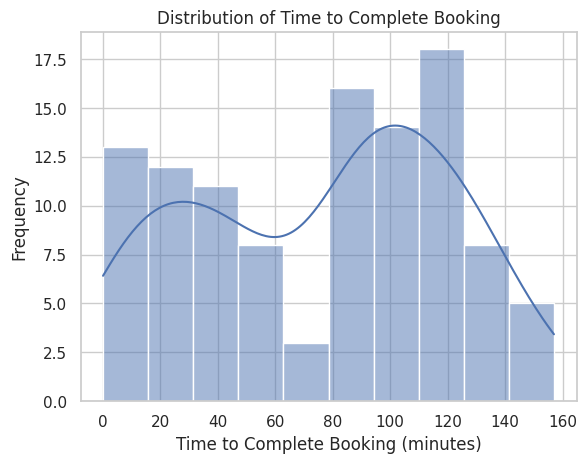

In [ ]:
sns.histplot(x=df['diff_time'], bins=10, kde=True)
plt.xlabel('Time to Complete Booking (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Complete Booking')
plt.show()

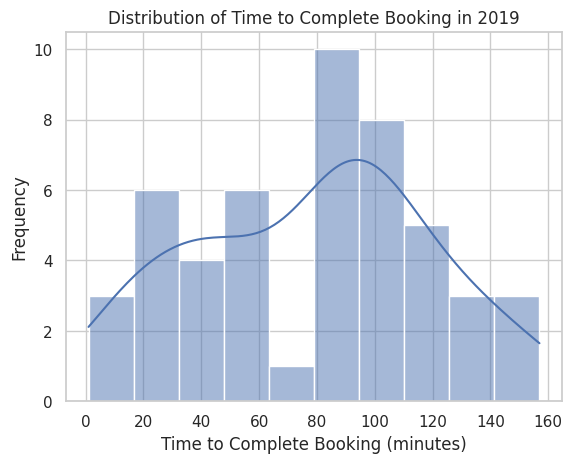

In [ ]:
df_2019 = df[df['Time_Of_Booking'].dt.year == 2019]

# Plot histogram of time to complete booking
sns.histplot(x=df_2019['diff_time'], bins=10, kde=True)
plt.xlabel('Time to Complete Booking (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time to Complete Booking in 2019')
plt.show()


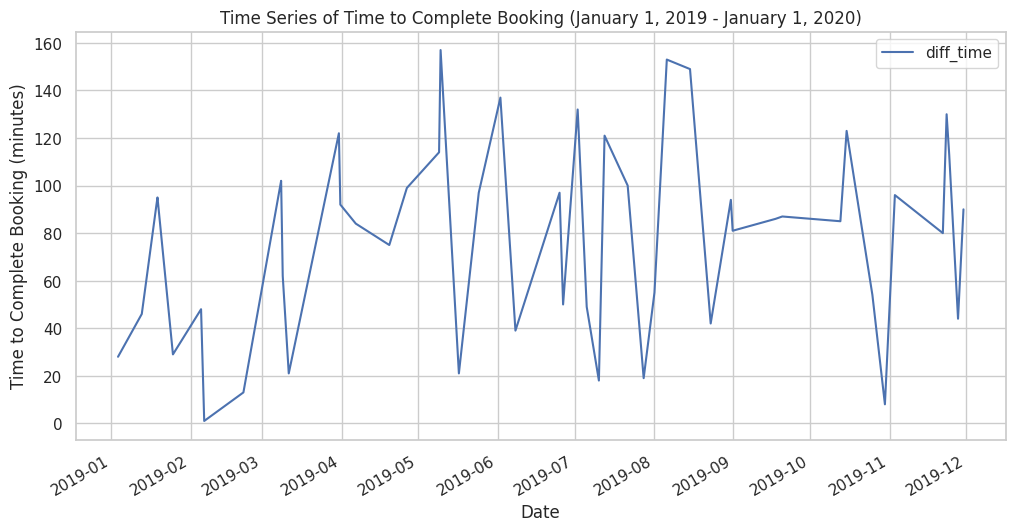

In [ ]:
# Filter data between January 1, 2019 and January 1, 2020
df_filtered = df[(df['Time_Of_Booking'] >= '2019-01-01') & (df['Time_Of_Booking'] <= '2020-01-01')]

# Plot the time series of diff_time
df_filtered.plot(x='Time_Of_Booking', y='diff_time', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Time to Complete Booking (minutes)')
plt.title('Time Series of Time to Complete Booking (January 1, 2019 - January 1, 2020)')
plt.show()


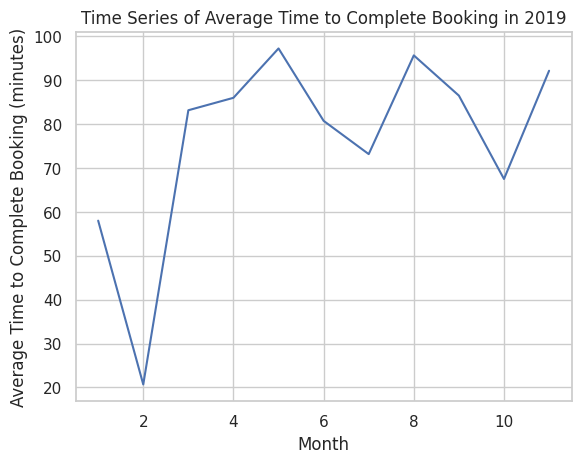

In [ ]:
df_2019 = df[df['Time_Of_Booking'].dt.year == 2019]

# Group by month and calculate the mean of diff_time
df_2019_monthly = df_2019.groupby(df_2019['Time_Of_Booking'].dt.month)['diff_time'].mean()

# Plot the time series
df_2019_monthly.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Average Time to Complete Booking (minutes)')
plt.title('Time Series of Average Time to Complete Booking in 2019')
plt.show()

### Another Ratention Rate

<ipython-input-77-dc4418e38932>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Full_Name'] = df['Cust_F_Name'] + ' ' + df['Cust_L_Name']


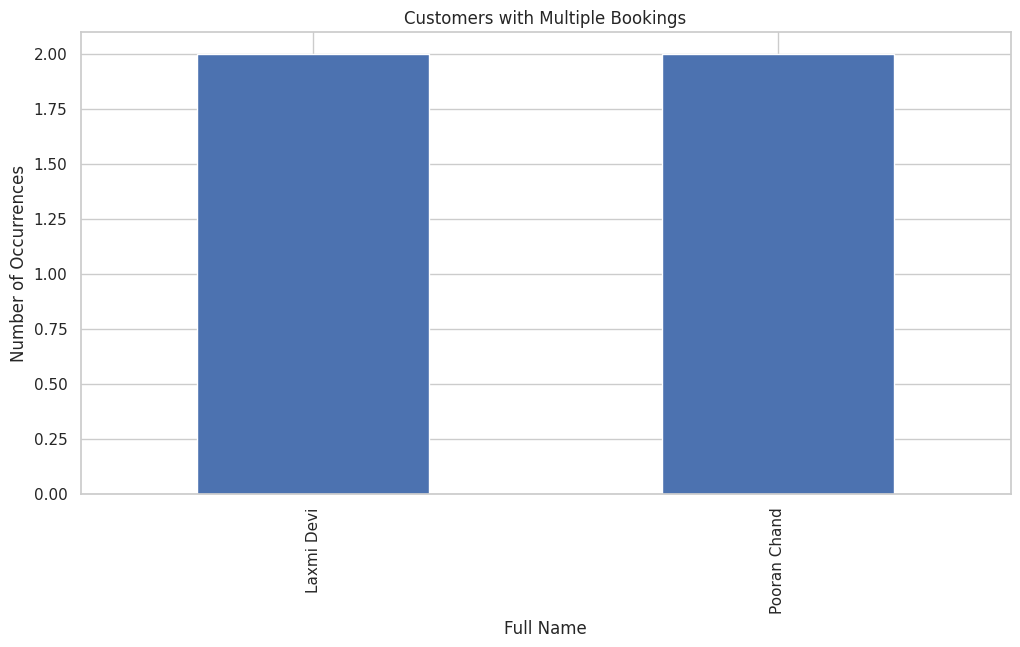

In [ ]:
df['Full_Name'] = df['Cust_F_Name'] + ' ' + df['Cust_L_Name']

# Count the number of occurrences for each full name
full_name_counts = df['Full_Name'].value_counts()

# Filter for names that appear more than once
multiple_names = full_name_counts[full_name_counts > 1]

# Create a bar chart to visualize the data
plt.figure(figsize=(12, 6))
multiple_names.plot(kind='bar')
plt.xlabel('Full Name')
plt.ylabel('Number of Occurrences')
plt.title('Customers with Multiple Bookings')
plt.show()
